In [34]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

from sklearn.decomposition import PCA

n_pca=12


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)


In [ ]:
af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
print(af.n_iter_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

labels=labels.reshape((nx,ny))

colors=np.random.uniform(size=(n_clusters_,3))
im=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if counts[labels[i,j]]<10:
        #    im[i,j]=np.array([1.,1.,1.])
        #else:
        im[i,j]=colors[labels[i,j]]
plt.imshow(im)

In [ ]:
n_clusters_=175
connectivity = grid_to_graph(n_x=64, n_y=64)

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,64))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,64))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=colors[grains[i,j]]
        else:
            im[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im)

In [ ]:
from sklearn.cluster import KMeans

n_clusters_=175

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,64))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        im[i,j]=colors[grains[i,j]]
plt.imshow(im)

In [23]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,64#146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('0-64-60-124/spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

from sklearn.decomposition import PCA

n_pca=12


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

87
213


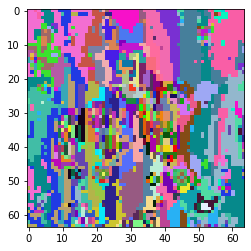

In [24]:
af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
print(af.n_iter_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

labels=labels.reshape((nx,ny))

colors=np.random.uniform(size=(n_clusters_,3))
im=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if counts[labels[i,j]]<10:
        #    im[i,j]=np.array([1.,1.,1.])
        #else:
        im[i,j]=colors[labels[i,j]]
plt.imshow(im)

(4096,)


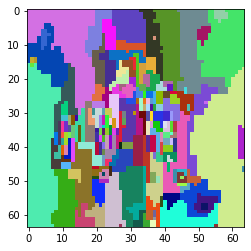

In [33]:
n_clusters_=213
connectivity = grid_to_graph(n_x=64, n_y=64)

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,64))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,64))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=colors[grains[i,j]]
        else:
            im[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im)

In [28]:
print(np.abs(np.load("spatial_X.npy")).min())

3.535584892563892e-09


In [29]:
print(np.abs(np.load("0-64-60-124/spatial_X.npy")).min())

1.7735814400454686e-08


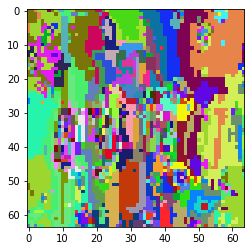

In [31]:
from sklearn.cluster import KMeans

n_clusters_=213

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,64))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(64):
        im[i,j]=colors[grains[i,j]]
plt.imshow(im)